In [5]:
import pandas as pd
import json
from matplotlib import pyplot as plt

In [6]:

df_transactions = pd.read_csv('data/transactions_data.csv')
df_transactions["date"] = pd.to_datetime(df_transactions["date"])


In [7]:
df_transactions["amount"] = df_transactions["amount"].apply(lambda x: x.replace("$", "").replace(",", "")).astype(float)

In [8]:
mcc_codes = json.load(open('data/raw/mcc_codes.json'))

In [9]:
mcc_codes["1711"]

'Heating, Plumbing, Air Conditioning Contractors'

In [35]:
def expenses_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a Pandas Data Frame with the Expenses by merchant category. The expected columns are:
        - Expenses Type --> (merchant category names)
        - Total Amount
        - Average
        - Max
        - Min
        - Num. Transactions
    The DataFrame should be sorted alphabeticaly by Expenses Type and values have to be rounded to 2 decimals. Return the dataframe with the columns in the given order.
    The merchant category names can be found in data/raw/mcc_codes.json .

    Create a Bar Plot with the data in absolute values and save it as "reports/figures/expenses_summary.png" .

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame  of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".


    Returns
    -------
    Pandas Dataframe with the Expenses by merchant category.

    """

    df_selected = df[(df["client_id"] == client_id) & \
                     (df["date"] >= start_date) & \
                     (df["date"] <= end_date) & \
                     (df["amount"] < 0)]

    mcc_des = df_selected["mcc"].apply(lambda x: mcc_codes[str(x)])

    df_selected = df_selected.copy()
    df_selected["mcc_des"] = mcc_des

    df_selected = df_selected.groupby("mcc_des").agg(
        Total_Amount = ("amount", "sum"),
        Average = ("amount", "mean"),
        Max = ("amount", "max"),
        Min = ("amount", "min"),
        Num_Transactions = ("amount", "count")
    ).reset_index()

    df_selected = df_selected.round(2)
    df_selected = df_selected.sort_values("mcc_des")

    


    plt.bar(df_selected["mcc_des"], -df_selected["Total_Amount"])
    plt.xticks(rotation=90)
    plt.ylabel("Total Amount")
    plt.title("Expenses by Merchant Category")
    # yaxis label in dollars
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

    return pd.DataFrame(
        {
            "Expenses Type"         : df_selected["mcc_des"],
            "Total Amount"          : -df_selected["Total_Amount"], # Negative values
            "Average"               : -df_selected["Average"], # Negative values
            "Max"                   : -df_selected["Max"], # Negative values
            "Min"                   : -df_selected["Min"], # Negative values
            "Num. Transactions"     : df_selected["Num_Transactions"]
        }
    )

In [36]:
df_transactions["mcc"]

0           5499
1           5311
2           4829
3           4829
4           5813
            ... 
13305910    5499
13305911    5815
13305912    4900
13305913    5411
13305914    5921
Name: mcc, Length: 13305915, dtype: int64

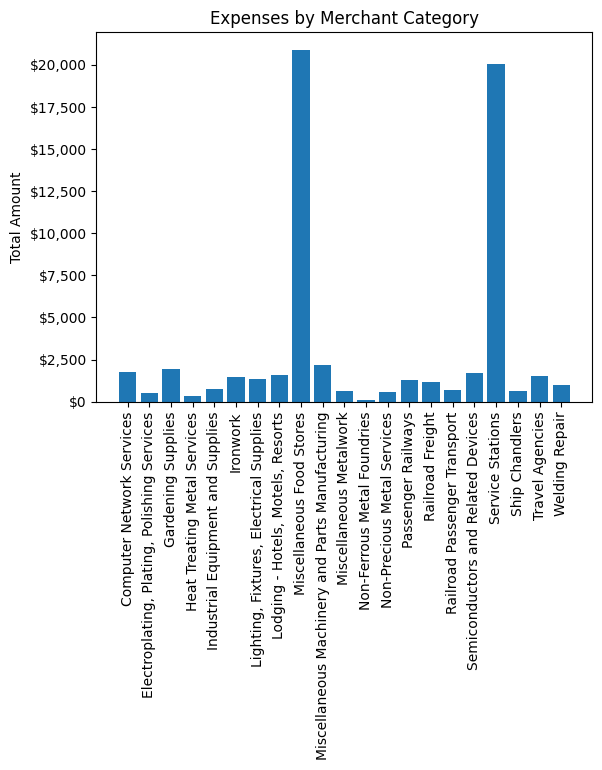

In [37]:
end_date = "2020-01-01"
start_date = "1800-01-31"
client_id = 1556
df_selected = expenses_summary(df_transactions, client_id, start_date, end_date)



In [13]:
df_selected

,Expenses Type,Total Amount,Average,Max,Min,Num. Transactions
0,Computer Network Services,1735.0,289.17,168.0,389.0,6
1,"Electroplating, Plating, Polishing Services",494.0,494.00,494.0,494.0,1
2,Gardening Supplies,1914.0,319.00,158.0,480.0,6
3,Heat Treating Metal Services,326.0,163.00,134.0,192.0,2
4,Industrial Equipment and Supplies,733.0,244.33,145.0,393.0,3
5,Ironwork,1485.0,297.00,150.0,472.0,5
6,"Lighting, Fixtures, Electrical Supplies",1362.0,340.50,140.0,496.0,4
7,"Lodging - Hotels, Motels, Resorts",1605.0,267.50,141.0,495.0,6
8,Miscellaneous Food Stores,20891.0,74.35,50.0,100.0,281
9,Miscellaneous Machinery and Parts Manufacturing,2151.0,358.50,126.0,482.0,6


In [20]:
from data.data_functions import expenses_summary

/home/djoroya/Documents/desafio/hackathon-caixabank-data-ai-report/src/data/data_functions.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["mcc_des"] = mcc_des


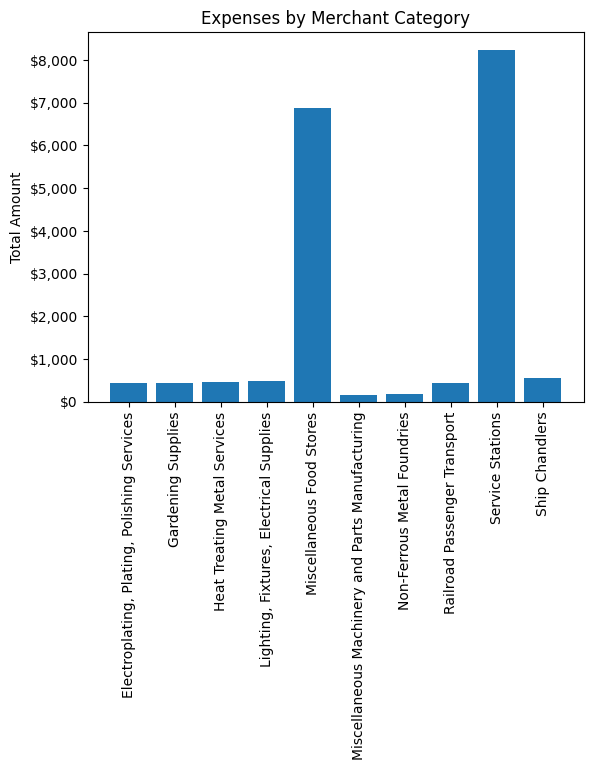

In [25]:
answer = expenses_summary(df_transactions, 126, "2013-01-01", "2020-01-31")

In [26]:
answer

,Expenses Type,Total Amount,Average,Max,Min,Num. Transactions
0,"Electroplating, Plating, Polishing Services",426.0,426.00,426.0,426.0,1
1,Gardening Supplies,446.0,446.00,446.0,446.0,1
2,Heat Treating Metal Services,457.0,457.00,457.0,457.0,1
3,"Lighting, Fixtures, Electrical Supplies",477.0,477.00,477.0,477.0,1
4,Miscellaneous Food Stores,6871.0,75.51,50.0,99.0,91
5,Miscellaneous Machinery and Parts Manufacturing,156.0,156.00,156.0,156.0,1
6,Non-Ferrous Metal Foundries,179.0,179.00,179.0,179.0,1
7,Railroad Passenger Transport,437.0,437.00,437.0,437.0,1
8,Service Stations,8241.0,73.58,51.0,100.0,112
9,Ship Chandlers,556.0,278.00,225.0,331.0,2


In [33]:
expected_answer = pd.DataFrame(
    {
        "Expenses Type": [
            "Electroplating, Plating, Polishing Services",
            "Gardening Supplies",
            "Heat Treating Metal Services",
            "Lighting, Fixtures, Electrical Supplies",
            "Miscellaneous Food Stores",
            "Miscellaneous Machinery and Parts Manufacturing",
            "Non-Ferrous Metal Foundries",
            "Railroad Passenger Transport",
            "Service Stations",
            "Ship Chandlers",
        ],
        "Total Amount": [
            426.0,
            446.0,
            457.0,
            477.0,
            6871.0,
            156.0,
            179.0,
            437.0,
            8241.0,
            556.0,
        ],
        "Average": [
            426.0,
            446.0,
            457.0,
            477.0,
            75.51,
            156.0,
            179.0,
            437.0,
            73.58,
            278.0,
        ],
        "Max": [
            426.0,
            446.0,
            457.0,
            477.0,
            50.0,
            156.0,
            179.0,
            437.0,
            51.0,
            225.0,
        ],
        "Min": [
            426.0,
            446.0,
            457.0,
            477.0,
            99.0,
            156.0,
            179.0,
            437.0,
            100.0,
            331.0,
        ],
        "Num. Transactions": [1, 1, 1, 1, 91, 1, 1, 1, 112, 2],
    }
)


In [34]:

pd.testing.assert_frame_equal(answer, expected_answer)